# Customer Segmentation in Python
## Segmentation using K-Means clustering algorithm
### Suppose that we have a company that selling some of the product, and you want to know how well does the selling performance of the product.

### You have the data that can we analyze, but what kind of analysis that we can do? 

### Well, we can segment customers based on their buying behaviour on the market. 

## The data is really huge, and we can not analyze it using a bare eye. We have to use machine learning algorithms and the power of computing for it.

### This article will show you how to cluster customers on segments based on their behaviour using the K-Means algorithm in Python. 


### Plan Of Attack
#### Before we get into the process, I will give you a brief on what kind of steps we will get.
- Gather the data
- Pre-process the data
- Explore the data
- Cluster the data
- Interpret the result

### The Analysis

### Gathering Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('CustomerSegmentation_onlineretailsales.xlsx')

In [3]:
df = df[df['CustomerID'].notna()]

In [4]:
df.shape

(406829, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
#df_fix = df.sample(30000, random_state = 42)
df_fix = df
df_fix.shape

(406829, 8)

In [7]:
df_fix.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Preprocessing
### Create RFM Table

In [8]:
# Convert to show date only
from datetime import datetime
df_fix["InvoiceDate"] = df_fix["InvoiceDate"].dt.date

# Create TotalSum colummn
df_fix["TotalSum"] = df_fix["Quantity"] * df_fix["UnitPrice"]

# Create date variable that records recency
import datetime
snapshot_date = max(df_fix.InvoiceDate) + datetime.timedelta(days=1)

# Aggregate data by each customer
customers = df_fix.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

# Rename columns
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

In [9]:
customers.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


### Manage Skewness

#### The data should meet assumptions where the variables are not skewed and have the same mean and variance.

In regression modeling, we often apply transformations to achieve the following two goals:

1.to satisfy the homogeneity of variances assumption for the errors.
2.to linearize the fit as much as possible.

Because of that, we have to manage the skewness of the variables.
Here are the visualizations of each variable,

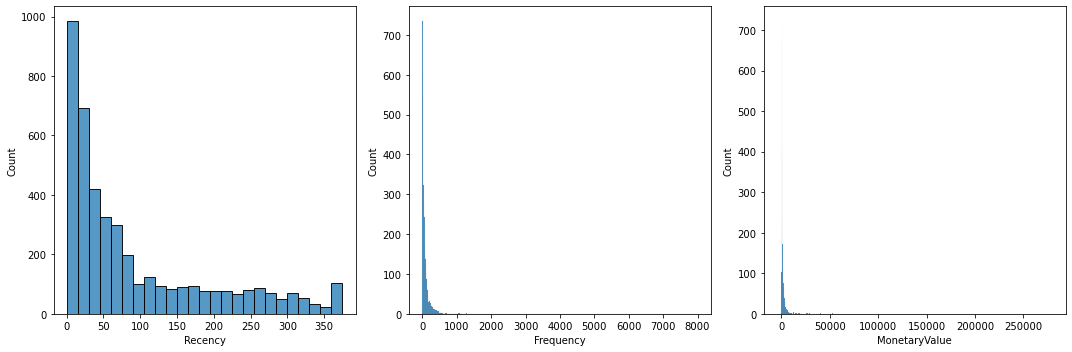

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(customers['Recency'], ax=ax[0])
sns.histplot(customers['Frequency'], ax=ax[1])
sns.histplot(customers['MonetaryValue'], ax=ax[2])
plt.tight_layout()
plt.show()

#### As we can see from above, we have to transform the data, so it has a more symmetrical form.

#### There are some methods that we can use to manage the skewness, they are,
1.log transformation

2.square root transformation

3.box-cox transformation

### Note: We can use the transformation if and only if the variable only has positive values.

In [11]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(15,9))
    ax1 = sns.histplot(customers[x], ax=ax[0,0])
    ax2 = sns.histplot(np.log(customers[x]), ax=ax[0,1])
    ax3 = sns.histplot(np.sqrt(customers[x]), ax=ax[1,0])
    ax4 = sns.histplot(stats.boxcox(customers[x])[0], ax=ax[1,1])

    ax1.title.set_text('without transformation')
    ax2.title.set_text('log transformation')
    ax3.title.set_text('square root transformation')
    ax4.title.set_text('box-cox transformation')
    plt.tight_layout()
    plt.show()
    
    print("Skewness value of each tranformation:\n")
    print('without transformation = ', customers[x].skew().round(2))
    print('log transformation = ', np.log(customers[x]).skew().round(2))
    print('square root transformation = ', np.sqrt(customers[x]).skew().round(2))
    print('box-cox transformation = ', pd.Series(stats.boxcox(customers[x])[0]).skew().round(2))

### Below are the visualization each variable and with and without transformations. From top left clockwise on each variable shows the plot without transformation, log transformation, square root transformation, and box-cox transformation.

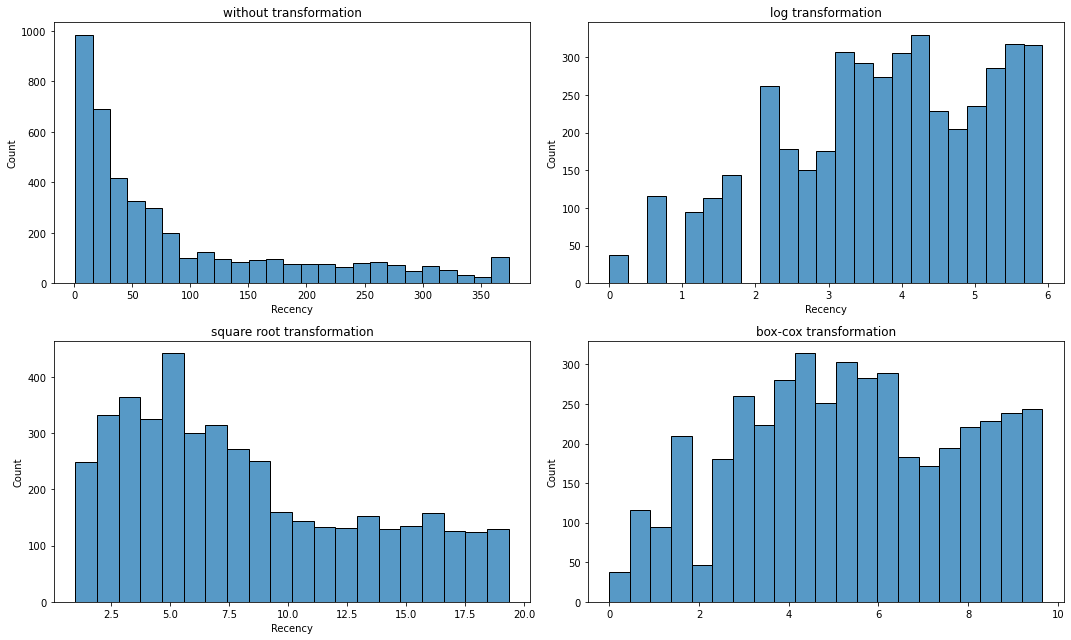

Skewness value of each tranformation:

without transformation =  1.25
log transformation =  -0.45
square root transformation =  0.6
box-cox transformation =  -0.07


In [12]:
analyze_skewness('Recency')

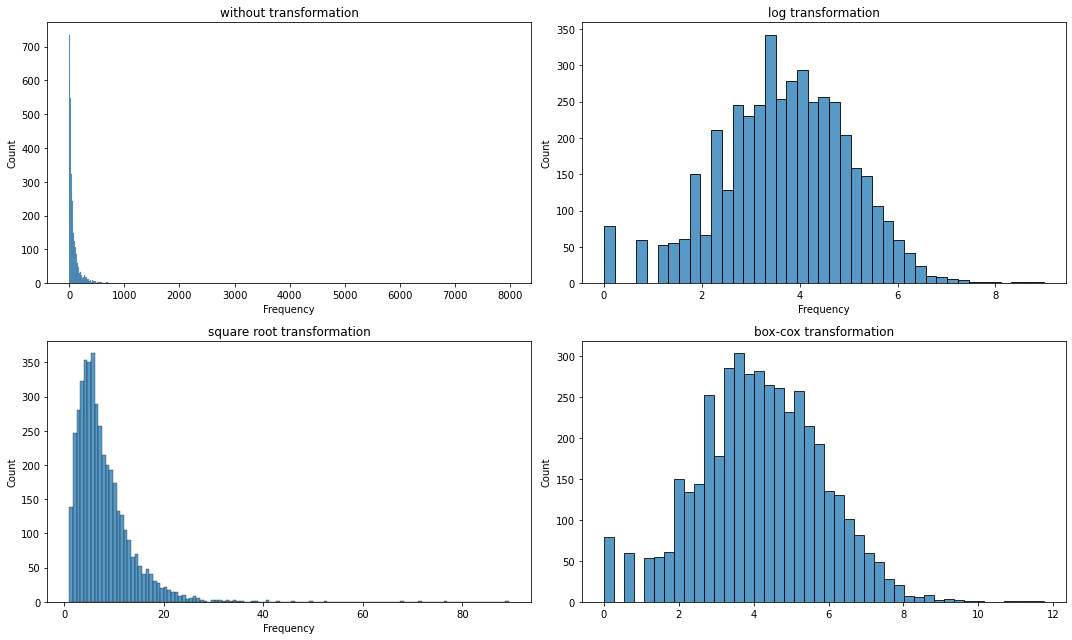

Skewness value of each tranformation:

without transformation =  18.15
log transformation =  -0.24
square root transformation =  3.2
box-cox transformation =  0.0


In [13]:
analyze_skewness('Frequency')

### Here is how to interpret the skewness value. If the value is close to 0, the variable tend to have symmetrical form. However, if it’s not, the variable has skew on it. Based on that calculation, we use variables that use box-cox transformations.

### Based on that calculation, we will utilize variables that use box-cox transformations. Except for the MonetaryValue variable because the variable includes negative values. To handle this variable, we can use cubic root transformation to the data, so the comparison looks like this,


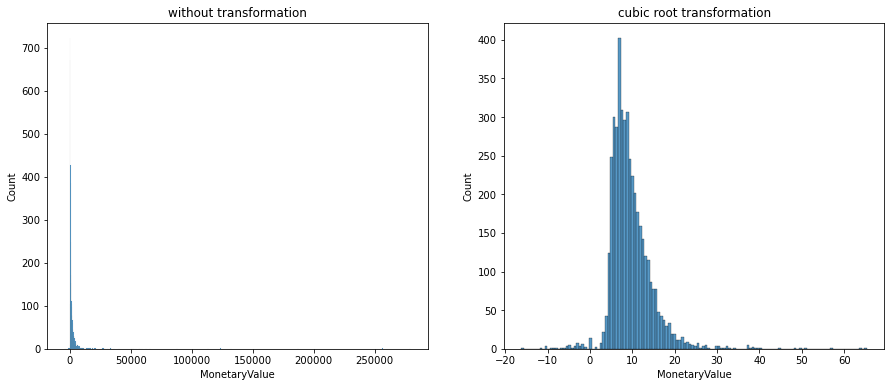

Skewness value of each tranformation:

without transformation =  21.71
cubic root transformation =  2.29


In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax1 = sns.histplot(customers['MonetaryValue'], ax=ax[0])
ax2 = sns.histplot(np.cbrt(customers['MonetaryValue']), ax=ax[1])
ax1.title.set_text('without transformation')
ax2.title.set_text('cubic root transformation')
plt.show()

print("Skewness value of each tranformation:\n")
print('without transformation = ', customers['MonetaryValue'].skew().round(2))
print('cubic root transformation = ', np.cbrt(customers['MonetaryValue']).skew().round(2))

In [15]:
pd.Series(np.cbrt(customers['MonetaryValue'])).values

array([ 0.        , 16.27392924, 12.15818345, ...,  5.61043971,
       12.79537593, 12.24781024])

## By using the transformation, we will have data that less skewed. Therefore, we can transform the RFM table with this code,

In [16]:
# Set the Numbers
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_fix.head()

,Recency,Frequency,MonetaryValue
0,9.314966,0.707055,0.000000
1,1.196521,6.060363,16.273929
2,6.146603,3.794006,12.158183
3,3.721132,4.862047,12.068017
4,9.201025,3.075409,6.941001


In [17]:
customers_fix.describe()

,Recency,Frequency,MonetaryValue
count,4372.000000,4372.000000,4372.000000
mean,5.365902,4.163558,9.624086
std,2.458295,1.647655,4.998417
min,0.000000,0.000000,-16.245725
25%,3.547952,3.075409,6.644590
50%,5.395110,4.166739,8.653831
75%,7.450548,5.293594,11.724572
max,9.651959,11.742237,65.381506


### If we look at the plot once more, each variable don’t have the same mean and variance. 
### We have to normalize it.
### To normalize, we can use StandardScaler object from scikit-learn library to do it.

### Centering and Scaling Variables

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
print(customers_normalized.mean(axis = 0).round(2))
print(customers_normalized.std(axis = 0).round(2))

[-0.  0. -0.]
[1. 1. 1.]


In [19]:
pd.DataFrame(customers_normalized).head()

,0,1,2
0,1.606608,-2.098072,-1.925647
1,-1.696240,1.151346,1.330542
2,0.317615,-0.224316,0.507038
3,-0.669146,0.423978,0.488997
4,1.560253,-0.660498,-0.536848


### Modelling

#### Right after we preprocess the data, now we can focus on modelling. To make segmentation from the data, we can use the K-Means algorithm to do this.

#### K-Means algorithm is an unsupervised learning algorithm that uses the geometrical principle to determine which cluster belongs to the data. By determine each centroid, we calculate the distance to each centroid. Each data belongs to a centroid if it has the smallest distance from the other. It repeats until the next total of the distance doesn’t have significant changes than before.

#### To make our clustering reach its maximum performance, we have to determine which hyperparameter fits to the data. To determine which hyperparameter is the best for our model and data, we can use the elbow method to decide. 

### The last term is the sum of squares error, or SSE. The error is the difference between the observed value and the predicted value.

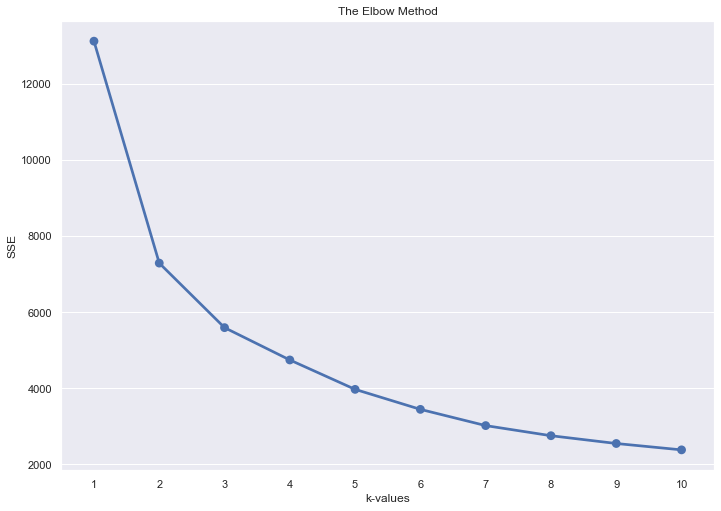

In [20]:
from sklearn.cluster import KMeans
sns.set(rc={'figure.figsize':(11.7,8.27)})

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k-values')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

## The x-axis is the value of the k, and the y-axis is the SSE value of the data. We will take the best parameter by looking at where the k-value will have a linear trend on the next consecutive k.

## Based on our observation, the k-value of 3 is the best hyperparameter for our model because the next k-value tend to have a linear trend. Therefore, our best model for the data is K-Means with the number of clusters is 3.

In [21]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(4372,)

In [22]:
customers.shape

(4372, 3)

## Cluster Analysis

In [23]:
customers["Cluster"] = model.labels_
customers.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,326,2,0.00,0
12347.0,3,182,4310.00,2
12348.0,76,31,1797.24,1
12349.0,19,73,1757.55,1
12350.0,311,17,334.40,0


### Interpret The Segment
#### We can summarize the RFM table based on clusters and calculate the mean of each variable.

In [24]:
customers.groupby('Cluster').agg({'Recency':'mean',
                                  'Frequency':'mean',
                                  'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         185.3      19.2         352.1  1659
1          42.9      67.5        1008.3  1934
2          18.5     313.7        7401.7   779

### Snake Plots

#### Besides that, we can analyze the segments using snake plot. It requires the normalized dataset and also the cluster labels. 

#### By using this plot, we can have a good visualization from the data on how the cluster differs from each other.

In [25]:
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
df_normalized.head()

,Recency,Frequency,MonetaryValue,ID,Cluster
0,1.606608,-2.098072,-1.925647,12346.0,0
1,-1.696240,1.151346,1.330542,12347.0,2
2,0.317615,-0.224316,0.507038,12348.0,1
3,-0.669146,0.423978,0.488997,12349.0,1
4,1.560253,-0.660498,-0.536848,12350.0,0


In [26]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,12346.0,0,Recency,1.606608
1,12347.0,2,Recency,-1.696240
2,12348.0,1,Recency,0.317615
3,12349.0,1,Recency,-0.669146
4,12350.0,0,Recency,1.560253


<AxesSubplot:xlabel='Attribute', ylabel='Value'>

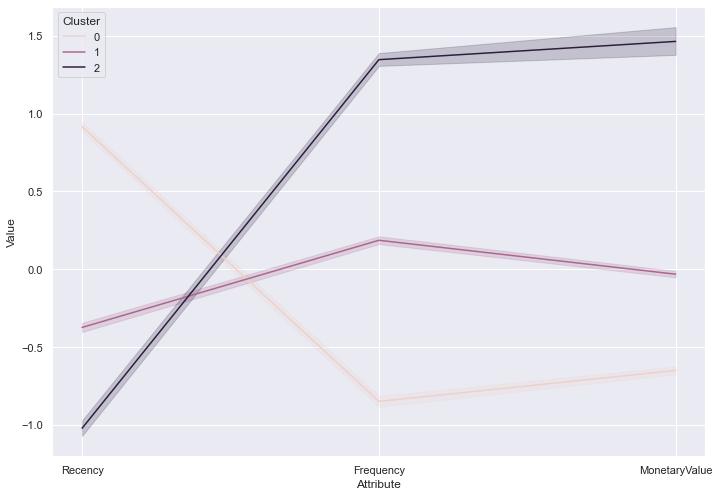

In [27]:
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_nor_melt)

## Model Insights

#### By using this plot, we know how each segment differs. It describes more than we use the summarized table.

### Then, the cluster 0 is less frequent, less to spend, but they buy the product recently. Therefore, it could be the cluster of new customer.

### Finally, the cluster 1 is less frequent, less to spend, and they buy the product at the old time. Therefore, it could be the cluster of churned customers.

### cluster 2 is frequent, spend more, and they buy the product recently. Therefore, it could be the cluster of a loyal customer.


In [28]:
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         185.3      19.2         352.1  1659
1          42.9      67.5        1008.3  1934
2          18.5     313.7        7401.7   779

In [29]:
cluster_avg = customers.groupby('Cluster').mean()
population_avg = customers.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp

,Cluster,Frequency,MonetaryValue,Recency
Cluster,,,,
0,NaN,-0.793471,-0.814528,1.001280
1,NaN,-0.274415,-0.468905,-0.536503
2,NaN,2.371100,2.898799,-0.800418


## Conclusion

### In conclusion, customer segmentation is really necessary for knowing what characteristics that exist on each customer.